In [1]:
pip install --upgrade tensorflow

  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached absl_py-1.1.0-py3-none-any.whl (123 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  

In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

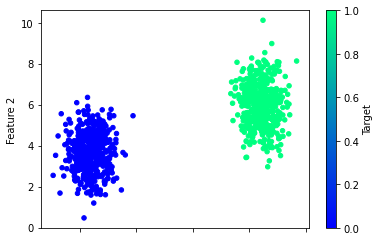

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.7365 - accuracy: 0.1600
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.2520
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.3680
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4720
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5573
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.6093
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.6880
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.8467
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.9907
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 1.0000
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0918 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

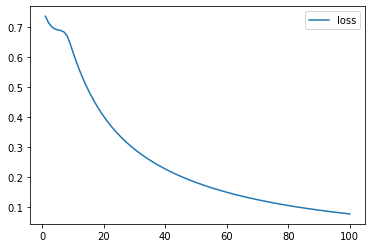

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

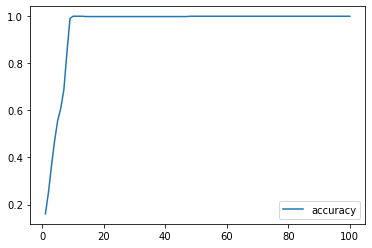

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0715 - accuracy: 1.0000 - 226ms/epoch - 28ms/step
Loss: 0.07146026194095612, Accuracy: 1.0


In [18]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")
# nn_model.predict_classes(new_X_scaled)

1/1 [==============================] - 0s 25ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

# Non-Linear Data

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

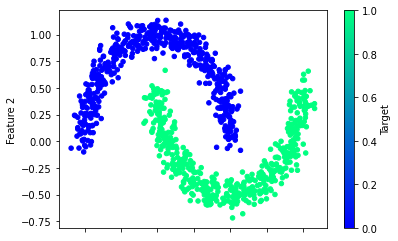

In [19]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [20]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [21]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9461 - accuracy: 0.5120
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7913 - accuracy: 0.5547
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.6013
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6255 - accuracy: 0.6400
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.6560
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.6747
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7000
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7120
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.7280
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.7387
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2600 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2595 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2593 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.8920
Epoch 93/100


<AxesSubplot:>

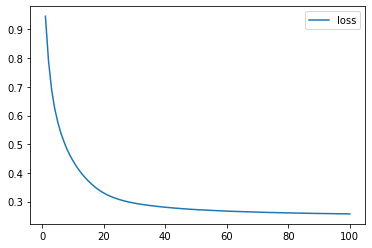

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

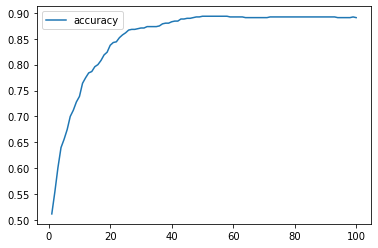

In [23]:
# Plot the accuracy
history_df.plot(y="accuracy")

# Multiple Neuron Neural Network 

In [24]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [25]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [26]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6597 - accuracy: 0.4720
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6318 - accuracy: 0.4827
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.5280
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.5880
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.6320
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7067
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5392 - accuracy: 0.7827
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.8093
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.8213
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.8240
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2684 - accuracy: 0.9080
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.9080
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2661 - accuracy: 0.9080
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2649 - accuracy: 0.9080
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2638 - accuracy: 0.9067
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2627 - accuracy: 0.9067
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2616 - accuracy: 0.9053
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2606 - accuracy: 0.9053
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2597 - accuracy: 0.9053
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.9053
Epoch 93/100
